In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Preprocessing**

In [2]:
import pandas as pd


## **USER**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
# path_user = "/content/drive/MyDrive/User.csv"
# user = pd.read_csv(path_user)

user = pd.read_csv("User.csv")

In [5]:
pd.set_option('display.max_columns', None)
user.head()

,Age,Gender,Height,Weight,Health Concern,Menu Type,Activity
0,42,2,157,74,6,2,2
1,55,2,151,55,8,2,2
2,37,2,180,47,5,2,4
3,17,2,147,57,1,2,1
4,31,1,147,51,1,1,4


In [6]:
user.dtypes

Age               int64
Gender            int64
Height            int64
Weight            int64
Health Concern    int64
Menu Type         int64
Activity          int64
dtype: object

In [7]:
user.groupby('Gender')['Height'].mean().sort_values(ascending=False).head()


Gender
2    168.035052
1    167.339806
Name: Height, dtype: float64

In [8]:
user.groupby('Gender')['Weight'].mean().sort_values(ascending=False).head()


Gender
1    69.984466
2    68.857732
Name: Weight, dtype: float64

In [9]:
constants_gender = {1 : 655.1 , 2 : 66.47}
constants_weight = {1 : 9.563 , 2 : 13.75}
constants_height = {1 : 1.850 , 2 : 5.003}
constants_age = {1 : 4.676 , 2 : 6.755}
user['BMR'] = user.apply(lambda row: constants_gender[row['Gender']] + (constants_weight[row['Gender']] * row['Weight']) + (constants_height[row['Gender']] * row['Height']) - (constants_age[row['Gender']] * row['Age']), axis=1)

constants_activity = {1 : 1.2, 2: 1.375, 3 : 1.55, 4 : 1.725, 5: 1.9}
user['Calories_Needed'] = user.apply(lambda row: row['BMR'] * constants_activity[row['Activity']], axis=1)

print(user)

     Age  Gender  Height  Weight  Health Concern  Menu Type  Activity  \
0     42       2     157      74               6          2         2   
1     55       2     151      55               8          2         2   
2     37       2     180      47               5          2         4   
3     17       2     147      57               1          2         1   
4     31       1     147      51               1          1         4   
..   ...     ...     ...     ...             ...        ...       ...   
995   59       1     159      41               3          2         3   
996   56       1     187      64               4          1         3   
997   22       1     152      43               6          1         1   
998   37       2     171      85               8          1         3   
999   53       1     164      55               8          1         4   

          BMR  Calories_Needed  
0    1585.731      2180.380125  
1    1206.648      1659.141000  
2    1363.325      2351.

In [10]:
constants_gender = {1 : 655.1 , 2 : 66.47}
constants_weight = {1 : 9.563 , 2 : 13.75}
constants_height = {1 : 1.850 , 2 : 5.003}
constants_age = {1 : 4.676 , 2 : 6.755}
user['BMR'] = user.apply(lambda row: constants_gender[row['Gender']] + (constants_weight[row['Gender']] * row['Weight']) + (constants_height[row['Gender']] * row['Height']) - (constants_age[row['Gender']] * row['Age']), axis=1)

constants_activity = {1 : 1.2, 2: 1.375, 3 : 1.55, 4 : 1.725, 5: 1.9}
user['Calories_Needed'] = user.apply(lambda row: row['BMR'] * constants_activity[row['Activity']], axis=1)

print(user)
user['Carbohydrates'] = ((20/100) * user['Calories_Needed'] /3)
user['Protein'] = ((40/100) * user['Calories_Needed'] /3)
user['Fat'] = ((40/100) * user['Calories_Needed'] /3)


     Age  Gender  Height  Weight  Health Concern  Menu Type  Activity  \
0     42       2     157      74               6          2         2   
1     55       2     151      55               8          2         2   
2     37       2     180      47               5          2         4   
3     17       2     147      57               1          2         1   
4     31       1     147      51               1          1         4   
..   ...     ...     ...     ...             ...        ...       ...   
995   59       1     159      41               3          2         3   
996   56       1     187      64               4          1         3   
997   22       1     152      43               6          1         1   
998   37       2     171      85               8          1         3   
999   53       1     164      55               8          1         4   

          BMR  Calories_Needed  
0    1585.731      2180.380125  
1    1206.648      1659.141000  
2    1363.325      2351.

In [11]:
user = user.rename(columns={'Menu Type': 'vegetarian'})

## **FOOD**

In [12]:
# path_food = "/content/drive/MyDrive/RAW_recipes.csv"
# food = pd.read_csv(path_food)

food = pd.read_csv("RAW_recipes.csv")

In [13]:
pd.set_option('display.max_columns', None)
food.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [14]:
pd.set_option('display.max_columns', None)
food[["ingredients"]].head()

,ingredients
0,"['winter squash', 'mexican seasoning', 'mixed ..."
1,"['prepared pizza crust', 'sausage patty', 'egg..."
2,"['ground beef', 'yellow onions', 'diced tomato..."
3,"['spreadable cheese with garlic and herbs', 'n..."
4,"['tomato juice', 'apple cider vinegar', 'sugar..."


In [15]:
food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = food.nutrition.str.split(",",expand=True)
food['calories'] = food['calories'].apply(lambda x: x.replace("[" ,""))
food['carbohydrates'] = food['carbohydrates'].apply(lambda x: x.replace("]" ,""))
food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

In [16]:
food.drop(["nutrition","submitted","contributor_id"],axis=1,inplace=True)

In [17]:
food['vegetarian'] = ['vegetarian' in tag for tag in food['tags']]

In [18]:
food= food[food['calories'] > 500 ]
food= food[food['calories'] < 1500 ]
food= food[food['minutes'] <= 180 ]


In [19]:
food.isnull().sum()
food.dropna(inplace=True)

In [20]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian
7,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False
24,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False
29,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False
39,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False
40,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231612,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
231615,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
231618,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False
231623,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False


In [21]:
food.describe()

,id,minutes,n_steps,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
count,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000,46594.000000
mean,224291.373803,51.190690,11.275551,10.131691,745.634610,61.512663,99.335644,43.934713,59.843542,77.918831,21.588445
std,139892.365640,34.969002,6.483749,4.007853,225.992185,34.979882,159.393369,92.038706,41.598274,55.075047,16.311468
min,49.000000,0.000000,1.000000,1.000000,500.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105200.250000,25.000000,7.000000,7.000000,571.700000,39.000000,14.000000,16.000000,26.000000,40.000000,10.000000
50%,206809.000000,45.000000,10.000000,10.000000,674.000000,56.000000,33.000000,32.000000,56.000000,68.000000,19.000000
75%,335790.500000,70.000000,14.000000,13.000000,852.375000,78.000000,120.000000,54.000000,83.000000,103.000000,29.000000
max,537319.000000,180.000000,97.000000,40.000000,1499.900000,255.000000,1491.000000,9443.000000,463.000000,568.000000,128.000000


C:\Users\Faturrahman\AppData\Local\Temp\ipykernel_28320\1158074963.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(food["minutes"],ax=ax[0])
C:\Users\Faturrahman\AppData\Local\Temp\ipykernel_28320\1158074963.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(food["n_steps"],ax=ax[1])


<Axes: xlabel='n_steps', ylabel='Density'>

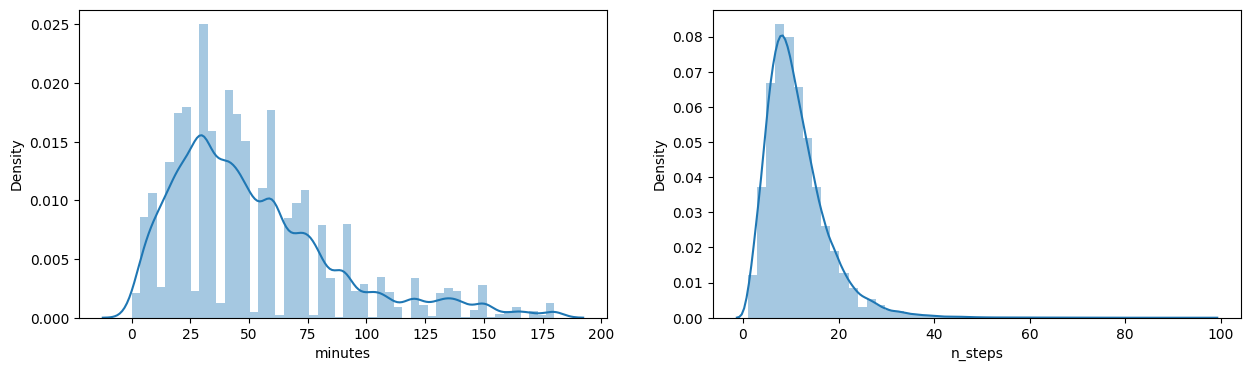

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.distplot(food["minutes"],ax=ax[0])
sns.distplot(food["n_steps"],ax=ax[1])

In [23]:
# fig,ax = plt.subplots(1,2,figsize=(15,4))
# sns.boxplot(data=food["minutes"],ax=ax[0])
# sns.boxplot(data=food["n_steps"],ax=ax[1])

In [24]:
# q1 = np.percentile(food["minutes"],25)
# q3 = np.percentile(food["minutes"],75)
# IQR = q3- q1
# upper = q3 + 1.5*IQR
# lower = q1 - 1.5*IQR

# food = food.drop((food[food["minutes"]>=upper].index | food[food["minutes"]<=lower].index),axis=0)

In [25]:
# q1 = np.percentile(food["n_steps"],25)
# q3 = np.percentile(food["n_steps"],75)
# IQR = q3- q1
# upper = q3 + 1.5*IQR
# lower = q1 - 1.5*IQR

# food = food.drop((food[food["n_steps"]>=upper].index | food[food["n_steps"]<=lower].index),axis=0)

In [26]:
# plt.figure(figsize=(14,6))
# sns.heatmap(food.corr(),annot=True)

In [27]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian
7,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False
24,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False
29,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False
39,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False
40,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231612,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
231615,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
231618,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False
231623,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False


In [28]:
# import ast

# # Set the batch size
# batch_size = 1000

# # Determine the total number of batches needed
# total_batches = (len(food) // batch_size) + 1

# # Create a set to store the unique ingredients
# unique_ingredients = set()

# # Iterate over the batches
# for batch_number in range(total_batches):
#     # Calculate the start and end indices for the current batch
#     start_index = batch_number * batch_size
#     end_index = (batch_number + 1) * batch_size
    
#     # Extract the current batch from the DataFrame
#     current_batch = food[start_index:end_index].copy()

#     # Extract the ingredients from the current batch
#     ingredients = current_batch['ingredients'].apply(ast.literal_eval)
    
#     # Update the set of unique ingredients
#     for ingredient_list in ingredients:
#         unique_ingredients.update(ingredient_list)
    
#     # Print the progress
#     print(f"Processing Batch {batch_number+1}/{total_batches}")

# # Convert the set of unique ingredients to a sorted list
# ingredientList = sorted(list(unique_ingredients))

# # Create an empty DataFrame to store the extracted columns
# ingredients_df = pd.DataFrame(columns=ingredientList)

# # Iterate over the batches again
# for batch_number in range(total_batches):
#     # Calculate the start and end indices for the current batch
#     start_index = batch_number * batch_size
#     end_index = (batch_number + 1) * batch_size
    
#     # Extract the current batch from the DataFrame
#     current_batch = food[start_index:end_index].copy()

#     # Encode ingredients into binary format for the current batch
#     current_batch['ingredients_bin'] = current_batch['ingredients'].apply(lambda x: [int(ingredient in ast.literal_eval(x)) for ingredient in ingredientList])
    
#     # Concatenate the current batch to the ingredients DataFrame
#     ingredients_df = pd.concat([ingredients_df, current_batch['ingredients_bin']], ignore_index=True)
    
#     # Print the progress
#     print(f"Processing Batch {batch_number+1}/{total_batches}")

# # Verify the extracted columns in the ingredients DataFrame
# print(ingredients_df)


In [29]:
# import ast

# tagList = []
# for index, row in food.iterrows():
#     tags = ast.literal_eval(row['tags'])
#     for tag in tags:
#         if tag not in tagList:
#             tagList.append(tag)

In [30]:
# ingredientList = []
# for index, row in food.iterrows():
#     ingredients = ast.literal_eval(row['ingredients'])
#     for ingredient in ingredients:
#         if ingredient not in ingredientList:
#             ingredientList.append(ingredient)

In [31]:
# ingredientList
# len(ingredientList)

In [32]:
# def binary(tag_list):
#     binaryTagList = []
    
#     for tag in tagList:
#         if tag in tag_list:
#             binaryTagList.append(1)
#         else:
#             binaryTagList.append(0)
    
#     return binaryTagList

In [33]:
# def binaryIngredient(ingredient_list):
#     binaryIngredientList = []
    
#     for ingredient in ingredientList:
#         if ingredient in ingredient_list:
#             binaryIngredientList.append(1)
#         else:
#             binaryIngredientList.append(0)
    
#     return binaryIngredientList

In [34]:
# food['tags_bin'] = food['tags'].apply(lambda x: binary(x))
# food['tags_bin']

In [35]:
# food['ingredients_bin'] = food['ingredients'].apply(lambda x: binaryIngredient(x))
# food['ingredients_bin']

In [36]:
# recipe_features = food[['name','calories','total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates', 'vegetarian' ]]


In [37]:
# # Assuming the 'tags_bin' column is part of an existing DataFrame called 'df'
# data = food['ingredients_bin'].apply(pd.Series)

# # Rename the columns if desired
# num_columns = data.shape[1]  # Get the number of columns
# column_names = ingredientList
# data.columns = column_names

# # Create a new DataFrame with the extracted columns
# ingredients_df = pd.DataFrame(data)

In [38]:
food = food.reset_index(drop=True)
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False


In [39]:
from scipy import spatial 
import numpy as np
def Similarity(foodId1,foodId2):
    a = food.iloc[foodId1]
    b = food.iloc[foodId2]

    tagsA = a['tags_bin']
    tagsB = b['tags_bin']

    tagDistance = spatial.distance.cosine(tagsA,tagsB)

    ingredientsA = a['ingredients_bin']
    ingredientsB = b['ingredients_bin']
    
    ingredientDistance = spatial.distance.cosine(ingredientsA,ingredientsB)

    caloriesA = np.ravel(a['calories'])
    caloriesB = np.ravel(b['calories'])
    caloriesDistance = spatial.distance.cosine(caloriesA,caloriesB)

    total_fatA = np.ravel(a['total fat'])
    total_fatB = np.ravel(b['total fat'])
    total_fatDistance = spatial.distance.cosine(total_fatA,total_fatB)

    sugarA = np.ravel(a['sugar'])
    sugarB = np.ravel(b['sugar'])
    sugarDistance = spatial.distance.cosine(sugarA,sugarB)

    sodiumA = np.ravel(a['sodium'])
    sodiumB = np.ravel(b['sodium'])
    sodiumDistance = spatial.distance.cosine(sodiumA,sodiumB)
   
    proteinA = np.ravel(a['protein'])
    proteinB = np.ravel(b['protein'])
    proteinDistance = spatial.distance.cosine(proteinA,proteinB)

    saturated_fatA = np.ravel(a['saturated fat'])
    saturated_fatB = np.ravel(b['saturated fat'])
    saturated_fatDistance = spatial.distance.cosine(saturated_fatA,saturated_fatB)

    carbohydratesA = np.ravel(a['carbohydrates'])
    carbohydratesB = np.ravel(b['carbohydrates'])
    carbohydratesDistance = spatial.distance.cosine(carbohydratesA,carbohydratesB)
    
    return tagDistance + ingredientDistance + caloriesDistance + total_fatDistance + sugarDistance + sodiumDistance + proteinDistance + saturated_fatDistance + carbohydratesDistance
    # return caloriesDistance

In [40]:
# food.columns

In [41]:
# # Assuming the 'tags_bin' column is part of an existing DataFrame called 'df'
# data = food['ingredients_bin'].apply(pd.Series)

# # Rename the columns if desired
# num_columns = data.shape[1]  # Get the number of columns
# column_names = ingredientList
# data.columns = column_names

# # Create a new DataFrame with the extracted columns
# food[column_names] = data

In [42]:
# # Assuming the 'tags_bin' column is part of an existing DataFrame called 'df'
# data = food['tags_bin'].apply(pd.Series)

# # Rename the columns if desired
# num_columns = data.shape[1]  # Get the number of columns
# column_names = tagList
# data.columns = column_names

# # Create a new DataFrame with the extracted columns
# tags_df = pd.DataFrame(data)

In [43]:
# # Assuming the 'tags_bin' column is part of an existing DataFrame called 'food'
# data = food['tags_bin'].apply(pd.Series)

# # Rename the columns if desired
# num_columns = data.shape[1]  # Get the number of columns
# column_names = tagList
# data.columns = column_names

# # Assign the extracted columns to new columns in the 'food' DataFrame
# food[column_names] = data

In [44]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False


tagList, calories, total fat, sugar, sodium, protein, saturated fat, carbohydrates, ingredientList, vegetarian

In [45]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from scipy.sparse import csr_matrix

# # Split and encode the ingredients using MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# ingredient_vectors = mlb.fit_transform(food['ingredients'].str.split(','))

# # Create a sparse matrix representation of the ingredient vectors
# ingredient_vectors_sparse = csr_matrix(ingredient_vectors)

# # Create a DataFrame with sparse ingredient vectors
# ingredient_df = pd.DataFrame.sparse.from_spmatrix(ingredient_vectors_sparse, columns=mlb.classes_)

# # Assign the values from ingredient_df as a new column in the 'food' DataFrame
# food[ingredient_df.columns] = ingredient_df

In [46]:
# recipe_features

In [47]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False


In [48]:
food.columns

Index(['name', 'id', 'minutes', 'tags', 'n_steps', 'steps', 'description',
       'ingredients', 'n_ingredients', 'calories', 'total fat', 'sugar',
       'sodium', 'protein', 'saturated fat', 'carbohydrates', 'vegetarian'],
      dtype='object')

In [49]:
user.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'Health Concern', 'vegetarian',
       'Activity', 'BMR', 'Calories_Needed', 'Carbohydrates', 'Protein',
       'Fat'],
      dtype='object')

In [50]:
# food['food types'] = np.nan
# food['food types'] = food['food types'].astype('str')
# for i in food['ingredients'].index:
#     if('eggs' not in food['ingredients'][i]):
#         if ('ice-cream' not in food['ingredients'][i] or 'chocolate'not in food['ingredients'][i] or 'cookies'not in food['ingredients'][i]
#             or 'chicken'not in food['ingredients'][i] or 'meat' not in food['ingredients'][i] or 'shrimp' not in food['ingredients'][i]
#             or 'ham' not in food['ingredients'][i] 
#             or 'pepperoni' in food['ingredients'][i] 
#             or 'cheese' not in food['ingredients'][i] 
#             or 'lamb' not in food['ingredients'][i] 
#             or 'ground beef' not in food['ingredients'][i] 
#             or 'milk' not in food['ingredients'][i] 
#             or 'sausage patty' not in food['ingredients'][i]
#             or 'sausage' not in food['ingredients'][i]
#             or 'fish' not in food['ingredients'][i]): 
#                 food['food types'][i] ='Veg'
#     elif ('eggs' in food['ingredients'][i]):
#          if('ice-cream' in food['ingredients'][i] 
#             or 'chocolate'in food['ingredients'][i] 
#             or 'cookies' in food['ingredients'][i]
#             or 'chicken' in food['ingredients'][i] 
#             or 'meat' in food['ingredients'][i]  
#             or 'shrimp' in food['ingredients'][i]
#             or 'ham' in food['ingredients'][i] 
#             or 'pepperoni' in food['ingredients'][i] 
#             or 'cheese' in food['ingredients'][i] 
#             or 'lamb' in food['ingredients'][i] 
#             or 'ground beef' in food['ingredients'][i] 
#             or 'milk' in food['ingredients'][i] 
#             or 'sausage patty' in food['ingredients'][i]
#             or 'sausage' in food['ingredients'][i]
#             or 'fish' in food['ingredients'][i]): 
#                 food['food types'][i] ='Non-Veg'
# food = food.drop(food[food['food types'] == 'nan'].index)
# for i in food.index:
#     if food['food types'][i] != 'Veg' and 20 < food['calories'][i] < 300:
#         if food['sugar'][i] < 50 and food['sodium'][i] < 5 and food['total fat'][i] < 67:
#             food['food types'][i] = 'obesity and veg'
#         elif food['sugar'][i]<31: food['food types'][i] = 'diabetes and veg'
#         elif food['saturated fat'][i]==0: food['food types'][i] = 'cholesterol and veg'
#         else:
#             food['food types'][i] = 'Health veg'
#     if food['food types'][i] != 'Non-Veg' and 20 < food['calories'][i] < 300:
#         if food['sugar'][i] < 50 and food['sodium'][i] < 5:
#             food['food types'][i] = 'obesity and non-veg'
#         elif food['sugar'][i] < 31: food['food types'][i] = 'diabetes and non-veg'
#         elif food['saturated fat'][i]==0: food['food types'][i] = 'cholestrol and non-veg'
#         else:
#             food['food types'][i] = 'Health non-veg'

In [51]:
food['fat'] = food['saturated fat'] + food['total fat']

In [52]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,fat
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0


In [53]:
# food = pd.get_dummies(food, columns=['food types'], prefix='', prefix_sep='')

In [54]:
user.rename(columns = {'Calories_Needed':'calories', 'Carbohydrates':'carbohydrates',
                              'Protein':'protein', 'Fat':'fat'}, inplace = True)

In [55]:
food_features = ['name', 'tags', 'ingredients', 'calories', 'fat', 'protein', 'carbohydrates', 'vegetarian']
user_features = ['calories', 'carbohydrates', 'protein', 'fat', 'vegetarian']

In [56]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Step 1: Prepare the Data
# # Load and preprocess the recipe dataset
# recipe_df = pd.read_csv('recipe_dataset.csv')
# recipe_features = recipe_df.drop(['name', 'id', 'minutes', 'tags', 'n_steps', 'steps', 'description',
#                                   'ingredients', 'n_ingredients', 'calories', 'total fat', 'sugar',
#                                   'sodium', 'protein', 'saturated fat', 'carbohydrates', 'vegetarian',
#                                   ], axis=1)
# recipe_labels = recipe_df['tags_bin']

# # Load and preprocess the user dataframe
# user_df = pd.read_csv('user_dataframe.csv')
# user_features = user_df.drop(['Calories_Needed'], axis=1)
# user_labels = user_df['Calories_Needed']

# # Scale numerical features
# scaler = StandardScaler()
# recipe_features_scaled = scaler.fit_transform(recipe_features)
# user_features_scaled = scaler.transform(user_features)

# # Split the data into training and testing sets
# recipe_train_features, recipe_test_features, recipe_train_labels, recipe_test_labels = \
#     train_test_split(recipe_features_scaled, recipe_labels, test_size=0.2, random_state=42)
# user_train_features, user_test_features, user_train_labels, user_test_labels = \
#     train_test_split(user_features_scaled, user_labels, test_size=0.2, random_state=42)

# # Step 3: Build the Recommendation Model
# model = tf.keras.Sequential([
#     tf.keras.layers.Concatenate(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Step 4: Train the Model
# model.fit([recipe_train_features, user_train_features],


In [57]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,fat
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0


In [62]:
user

,Age,Gender,Height,Weight,Health Concern,vegetarian,Activity,BMR,calories,carbohydrates,protein,fat
0,42,2,157,74,6,2,2,1585.731,2180.380125,145.358675,290.717350,290.717350
1,55,2,151,55,8,2,2,1206.648,1659.141000,110.609400,221.218800,221.218800
2,37,2,180,47,5,2,4,1363.325,2351.735625,156.782375,313.564750,313.564750
3,17,2,147,57,1,2,1,1470.826,1764.991200,117.666080,235.332160,235.332160
4,31,1,147,51,1,1,4,1269.807,2190.417075,146.027805,292.055610,292.055610
...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,159,41,3,2,3,1065.449,1651.445950,110.096397,220.192793,220.192793
996,56,1,187,64,4,1,3,1351.226,2094.400300,139.626687,279.253373,279.253373
997,22,1,152,43,6,1,1,1244.637,1493.564400,99.570960,199.141920,199.141920
998,37,2,171,85,8,1,3,1840.798,2853.236900,190.215793,380.431587,380.431587


In [59]:
# print(food_features.dtypes)
# print(user_features.dtypes)


# **MODEL**

In [60]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the Data
# Load and preprocess the recipe dataset
food_features = food[['calories', 'protein', 'fat', 'carbohydrates',
                     'vegetarian']]

user_features = user[['calories', 'protein', 'fat', 'carbohydrates', 'vegetarian']]


In [61]:
food_features

,calories,protein,fat,carbohydrates,vegetarian
0,1109.5,96.0,169.0,36.0,False
1,1290.4,22.0,630.0,1.0,False
2,804.7,28.0,322.0,10.0,False
3,647.6,54.0,110.0,16.0,False
4,783.4,36.0,67.0,37.0,True
...,...,...,...,...,...
46589,648.6,24.0,182.0,15.0,False
46590,595.5,5.0,1.0,50.0,False
46591,535.0,15.0,44.0,28.0,False
46592,629.0,99.0,146.0,6.0,False


In [63]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,fat
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0


In [102]:
# food.drop(['ingredients_bin', 'tags_bin'], axis=1, inplace=True)

In [103]:
# import random
# import json
# # Scale numerical features
# scaler = StandardScaler()
# recipe_features_scaled = scaler.fit_transform(food_features)  # Assuming food_features contains only numerical features
# user_features_scaled = scaler.transform(user_features)

# # Check the number of samples in each dataset
# num_samples = min(len(recipe_features_scaled), len(user_features_scaled))

# # Trim the datasets to have the same number of samples
# recipe_features_scaled = recipe_features_scaled[:num_samples]
# user_features_scaled = user_features_scaled[:num_samples]

# # Split the data into training and testing sets
# recipe_train_features, recipe_test_features, user_train_features, user_test_features = \
# train_test_split(recipe_features_scaled, user_features_scaled, test_size=0.2, random_state=42)

# # Create target data
# target_data = np.random.randint(2, size=num_samples)  # Replace with your actual target data

# # Split the target data into training and testing sets
# target_train, target_test = train_test_split(target_data, test_size=0.2, random_state=42)

# # Step 3: Build the Recommendation Model
# model = tf.keras.Sequential([
#     tf.keras.layers.Concatenate(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Step 4: Train the Model
# model.fit([recipe_train_features, user_train_features],
#           target_train,
#           epochs=1000,
#           batch_size=32,
#           validation_data=([recipe_test_features, user_test_features], target_test))

# # Step 5: Evaluate the Model
# loss, accuracy = model.evaluate([recipe_test_features, user_test_features], target_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

# model.save('recommendation_model.h5')

In [104]:
# import random
# import json
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# # Scale numerical features
# scaler = StandardScaler()
# recipe_features_scaled = scaler.fit_transform(food_features)  # Assuming food_features contains only numerical features
# user_features_scaled = scaler.transform(user_features)

# # # Check the number of samples in each dataset
# num_samples = min(len(recipe_features_scaled), len(user_features_scaled))

# # # Trim the datasets to have the same number of samples
# recipe_features_scaled = recipe_features_scaled[:num_samples]
# user_features_scaled = user_features_scaled[:num_samples]

# # # Create target data
# target_data = np.random.randint(2, size=num_samples)  # Replace with your actual target data

# # Split the data into training and testing sets
# recipe_train_features, recipe_test_features, user_train_features, user_test_features, target_train, target_test = \
#     train_test_split(recipe_features_scaled, user_features_scaled, target_data, test_size=0.2, random_state=42)

# # Step 3: Build the Recommendation Model
# recipe_input = tf.keras.Input(shape=(recipe_train_features.shape[1],))
# user_input = tf.keras.Input(shape=(user_train_features.shape[1],))

# concatenated = tf.keras.layers.Concatenate()([recipe_input, user_input])
# x = tf.keras.layers.Dense(64, activation='relu')(concatenated)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
# output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=[recipe_input, user_input], outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit([recipe_train_features, user_train_features], target_train,
#           epochs=1000,
#           batch_size=32,
#           validation_data=([recipe_test_features, user_test_features], target_test))

# # Evaluate the model
# loss, accuracy = model.evaluate([recipe_test_features, user_test_features], target_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

# # Save the model
# model.save('recommendation_model.h5')

In [65]:
import random
import json
import numpy as np
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
recipe_features_scaled = scaler.fit_transform(food_features)  # Assuming food_features contains only numerical features
user_features_scaled = scaler.transform(user_features)

# # Check the number of samples in each dataset
num_samples = min(len(recipe_features_scaled), len(user_features_scaled))
print("num_samples =", num_samples)

# # Trim the datasets to have the same number of samples
recipe_features_scaled = recipe_features_scaled[:num_samples]
user_features_scaled = user_features_scaled[:num_samples]

# Step 3: Build the User-Based Recommendation Model
user_input = tf.keras.Input(shape=(user_features_scaled.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(user_input)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(recipe_features_scaled.shape[1], activation='linear')(x)

model = tf.keras.Model(inputs=user_input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use mean squared error as the loss function

# Train the model
model.fit(user_features_scaled, recipe_features_scaled, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(user_features_scaled, recipe_features_scaled)
print("Test Loss:", loss)

user_input_data = np.array([[600, 50, 200, 80, 1]])
# Generate recipe using user input
user_input_data = scaler.transform(user_input_data)  # Assuming you have new user input stored in user_input_data
recipe_prediction = model.predict(user_input_data)

print(recipe_prediction)

# If needed, you can invert the scaling to obtain the actual recipe feature values
# recipe_prediction = scaler.inverse_transform(recipe_prediction)

# Calculate Euclidean distance between predicted features and each recipe in recipe_data
distances = np.linalg.norm(recipe_features_scaled - recipe_prediction, axis=1)

# Find the indices of the top 5 recipes with the smallest distances
closest_recipe_indices = np.argsort(distances)[:5]

recipe_list = []
# Retrieve and print the recipe details for the top 5 recommendations
for recipe_index in closest_recipe_indices:
    recipe_details = food.iloc[recipe_index]
    print("Title:", recipe_details['name'])
    print("Minutes:", recipe_details['minutes'])
    print("Description:", recipe_details['description'])
    print("Calories:", recipe_details['calories'])
    print("Total Fat:", recipe_details['total fat'])
    print("Sugar:", recipe_details['sugar'])
    print("Sodium:", recipe_details['sodium'])
    print("Protein:", recipe_details['protein'])
    print("Saturated Fat:", recipe_details['saturated fat'])
    print("Carbohydrates:", recipe_details['carbohydrates'])
    print("------------------------------")
    recipe_dict = {
        'Ingredients': recipe_details['ingredients'],
        'Instructions': recipe_details['steps'],
        'Tags': recipe_details['tags'],
    }
    recipe_list.append(recipe_dict)

# Save the model
model.save('recommendation_model.h5')

num_samples = 1000
Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.1885
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0354
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0248
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0256
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0304
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0297
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0304
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0387
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0349
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0269
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0319
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0302
Epoch 13/100
32/32

c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
[[-0.11453871 -0.88790226 -0.28966677 -0.29588473 -0.42226642]]
Title: amarillo cheese fries and dip   like the lone star  copycat
Minutes: 40
Description: when our dd and sil came for a visit, they introduced us to two mouthwatering recipes which they prepared as a birthday treat. they prepared these fries along with marinated grilled steaks, like the outback. needless to say, it was an absolutely delicious meal. hope you enjoy this as much as we did.
Calories: 721.2
Total Fat: 75.0
Sugar: 11.0
Sodium: 79.0
Protein: 20.0
Saturated Fat: 54.0
Carbohydrates: 20.0
------------------------------
Title: addictive corn dip
Minutes: 10
Description: great flavor and so easy to make.  it's best to let it sit in the fridge overnight.  the cayenne definitely adds some spice, so use sparingly if you wish.
Calories: 639.5
Total Fat: 61.0
Sugar: 21.0
Sodium: 41.0
Protein: 26.0
Saturated Fat: 67.0
Carbohydrates: 20.0
------------------------------


In [106]:
# import random
# import json
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf

# # Scale numerical features
# scaler = StandardScaler()
# recipe_features_scaled = scaler.fit_transform(food_features)  # Assuming food_features contains only numerical features
# user_features_scaled = scaler.transform(user_features)

# # # Check the number of samples in each dataset
# num_samples = min(len(recipe_features_scaled), len(user_features_scaled))
# print("num_samples =", num_samples)
# # # Trim the datasets to have the same number of samples
# recipe_features_scaled = recipe_features_scaled[:num_samples]
# user_features_scaled = user_features_scaled[:num_samples]

# # Step 3: Build the User-Based Recommendation Model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(user_features_scaled.shape[1],)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(recipe_features_scaled.shape[1], activation='linear')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')  # Use mean squared error as the loss function

# # Train the model
# model.fit(user_features_scaled, recipe_features_scaled, epochs=100, batch_size=32)

# # Evaluate the model
# loss = model.evaluate(user_features_scaled, recipe_features_scaled)
# print("Test Loss:", loss)

# user_input_data = np.array([[600, 50, 200, 80, 0, 1]])
# # Generate recipe using user input
# user_input_data = scaler.transform(user_input_data)  # Assuming you have new user input stored in user_input_data
# recipe_prediction = model.predict(user_input_data)

# print(recipe_prediction)

# # Calculate Euclidean distance between predicted features and each recipe in recipe_data
# distances = np.linalg.norm(recipe_features_scaled - recipe_prediction, axis=1)

# # Find the indices of the top 5 recipes with the smallest distances
# closest_recipe_indices = np.argsort(distances)[:5]

# recipe_list = []
# # Retrieve and print the recipe details for the top 5 recommendations
# for recipe_index in closest_recipe_indices:
#     recipe_details = food.iloc[recipe_index]
#     print("Title:", recipe_details['name'])
#     print("Minutes:", recipe_details['minutes'])
#     print("Description:", recipe_details['description'])
#     print("Calories:", recipe_details['calories'])
#     print("Total Fat:", recipe_details['total fat'])
#     print("Sugar:", recipe_details['sugar'])
#     print("Sodium:", recipe_details['sodium'])
#     print("Protein:", recipe_details['protein'])
#     print("Saturated Fat:", recipe_details['saturated fat'])
#     print("Carbohydrates:", recipe_details['carbohydrates'])
#     print("------------------------------")
#     recipe_dict = {
#         'Ingredients': recipe_details['ingredients'],
#         'Instructions': recipe_details['steps'],
#         'Tags': recipe_details['tags'],
#     }
#     recipe_list.append(recipe_dict)
# print(recipe_list)

# # Save the model
# model.save('recommendation_model.h5')

In [75]:
food_features.dtypes

calories         float64
protein          float64
fat              float64
carbohydrates    float64
vegetarian          bool
dtype: object

In [76]:
# food_features.to_csv('food_features.csv', index=False)

In [77]:
# food.to_csv('food.csv', index=False)

In [108]:
user.dtypes

Age                 int64
Gender              int64
Height              int64
Weight              int64
Health Concern      int64
Activity            int64
BMR               float64
calories          float64
carbohydrates     float64
protein           float64
fat               float64
Non-Veg             int32
Veg                 int32
dtype: object

In [109]:
user_features.dtypes

calories         float64
protein          float64
fat              float64
carbohydrates    float64
Non-Veg            int32
Veg                int32
dtype: object

In [110]:
# constants_gender = {1 : 655.1 , 2 : 66.47}
# constants_weight = {1 : 9.563 , 2 : 13.75}
# constants_height = {1 : 1.850 , 2 : 5.003}
# constants_age = {1 : 4.676 , 2 : 6.755}
# user['BMR'] = user.apply(lambda row: constants_gender[row['Gender']] + (constants_weight[row['Gender']] * row['Weight']) + (constants_height[row['Gender']] * row['Height']) - (constants_age[row['Gender']] * row['Age']), axis=1)

# constants_activity = {1 : 1.2, 2: 1.375, 3 : 1.55, 4 : 1.725, 5: 1.9}
# user['Calories_Needed'] = user.apply(lambda row: row['BMR'] * constants_activity[row['Activity']], axis=1)

# print(user)
# user['Carbohydrates'] = ((20/100) * user['Calories_Needed'] /3)
# user['Protein'] = ((40/100) * user['Calories_Needed'] /3)
# user['Fat'] = ((40/100) * user['Calories_Needed'] /3)
# # Create new columns 'Non-Veg' and 'Veg' based on 'Menu Type'
# user['Non-Veg'] = (user['Menu Type'] == 1).astype(int)
# user['Veg'] = (user['Menu Type'] == 2).astype(int)

In [78]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,fat
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0


In [112]:
food.dtypes

name              object
id                 int64
minutes            int64
tags              object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
calories         float64
total fat        float64
sugar            float64
sodium           float64
protein          float64
saturated fat    float64
carbohydrates    float64
vegetarian          bool
fat              float64
Non-Veg             bool
Veg                 bool
dtype: object

In [113]:
food = food.rename(columns={'total fat': 'total_fat', 'saturated fat' : 'saturated_fat','Non-Veg' : 'Non_Veg'})


In [114]:
import ast
food['tags'] = food['tags'].apply(ast.literal_eval)

# Convert the 'ingredients' column into a list of strings
food['ingredients'] = food['ingredients'].apply(ast.literal_eval)

# Convert the 'steps' column into a list of strings
food['steps'] = food['steps'].apply(ast.literal_eval)

In [115]:
food.tags[1]

['30-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'preparation',
 'very-low-carbs',
 'sauces',
 'condiments-etc',
 'eggs-dairy',
 'eggs',
 'stove-top',
 'dietary',
 'low-carb',
 'savory-sauces',
 'low-in-something',
 'equipment',
 'number-of-servings']

In [166]:
# food.to_csv('food.csv', index=False)

In [116]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,vegetarian,fat,Non_Veg,Veg
0,backyard style barbecued ribs,67888,120,"[weeknight, time-to-make, course, main-ingredi...",10,[in a medium saucepan combine all the ingredie...,this recipe is posted by request and was origi...,"[pork spareribs, soy sauce, fresh garlic, fres...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0,False,True
1,easiest ever hollandaise sauce,49262,25,"[30-minutes-or-less, time-to-make, course, mai...",7,[cut the butter into several pieces and bring ...,the secret to this easy hollandaise sauce is i...,"[butter, lemon, juice of, salt, white pepper, ...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0,False,True
2,george s at the cove black bean soup,44123,90,"[weeknight, time-to-make, course, main-ingredi...",11,"[in 1 / 4 cup butter , saute carrots , onion ,...",an original recipe created by chef scott meska...,"[unsalted butter, carrot, onion, celery, brocc...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0,False,True
3,i don t feel like cooking tonight casserole,22123,45,"[60-minutes-or-less, time-to-make, course, mai...",6,"[brown onion and meat in the oil , drain any e...",this is a hearty and filling casserole for tho...,"[ground beef, onion, frozen vegetables, cream ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0,False,True
4,i stole the idea from mirj sesame noodles,90921,18,"[30-minutes-or-less, time-to-make, course, mai...",8,"[in a large pot , cook your angel hair pasta u...",i love mirj's funky chicken with sesame noodle...,"[angel hair pasta, toasted sesame oil, soy sau...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"[60-minutes-or-less, time-to-make, course, mai...",13,"[heat oven to 420 deg f / 210 deg c, line a sm...",i'd like to dedicate this recipe to molly53. w...,"[pastry dough, cream cheese, salt, green onion...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0,False,True
46590,zuvers barbecue sauce,381216,30,"[30-minutes-or-less, time-to-make, course, pre...",6,"[mix first 5 ingredients in sauce pan, turn bu...","this barbecue sauce is great on ribs, chicken ...","[molasses, ketchup, apple cider vinegar, worce...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0,False,True
46591,zwetschgenkuchen plum cake,27846,60,"[60-minutes-or-less, time-to-make, course, cui...",11,"[prepare pastry: cut margarine into flour , su...",this is a classic german pastry and a deliciou...,"[margarine, all-purpose flour, sugar, baking p...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0,False,True
46592,zwiebelfleisch onion beef,86005,55,"[60-minutes-or-less, time-to-make, course, mai...",7,"[cut the meat into thin strips, heat butter in...","a hearty, rib-sticking german dish posted in r...","[round steaks, butter, onions, marjoram, garli...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0,False,True


In [71]:
food.vegetarian.value_counts()


vegetarian
False    42187
True      4407
Name: count, dtype: int64

In [74]:
from flask import Flask, request, jsonify
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd

app = Flask(__name__)

# Load and preprocess the recipe data
food_features = food_features# Load your recipe data here
scaler = StandardScaler()
recipe_features_scaled = scaler.fit_transform(food_features)

# Load the trained model
model = tf.keras.models.load_model('C:/Users/Faturrahman/Downloads/Projek Capstone/recommendation_model.h5')  # Replace 'your_model_path' with the actual path to your trained model
@app.route("/<int:age>/<int:gender>/<int:height>/<int:weight>/<int:healthconcern>/<int:menutype>/<int:activity>", methods=['GET'])
def recommend_recipe(age,gender,height,weight,healthconcern,menutype,activity):
    # Preprocess user input
    if gender == 1:
        constants_gender = 655.1
        constants_weight = 9.563
        constants_height = 1.850
        constants_age = 4.676
    elif gender == 2:
        constants_gender = 66.47
        constants_weight = 13.75
        constants_height = 5.003
        constants_age =  6.755
    BMR = constants_gender + (constants_weight * weight) + (constants_height * height) - (constants_age * age)
    if activity == 1:
        constants_activity = 1.2
    elif activity == 2:
        constants_activity = 1.375
    elif activity == 3:
        constants_activity = 1.55
    elif activity == 4:
        constants_activity = 1.725
    elif activity == 5:
        constants_activity = 1.9
    calories = BMR * constants_activity
    carbohydrates = ((20/100) * calories /3)
    protein = ((40/100) * calories /3)
    fat = ((40/100) * calories /3)
    if menutype == 1:
        vegetarian = 0
    elif menutype == 2:
        vegetarian = 1
    # Handle invalid gender input (optional)
    constants_gender = 0.0  # or any other default value
    user_input_data = np.array([calories,protein,fat,carbohydrates,vegetarian])
    user_input_data = user_input_data.reshape(1, -1)
    user_input_data = scaler.transform(user_input_data)

    # Generate recipe predictions
    recipe_prediction = model.predict(user_input_data)

    # Calculate Euclidean distance between predicted features and each recipe in recipe_data
    distances = np.linalg.norm(recipe_features_scaled - recipe_prediction, axis=1)

    # Find the indices of the top 5 recipes with the smallest distances
    closest_recipe_indices = np.argsort(distances)

    recipe_list = []
    # Retrieve the recipe details for the top 5 recommendations
    recipe_indices = []
    for recipe_index in closest_recipe_indices:
        recipe_details = food.iloc[recipe_index]
        
        # Check if the recipe is suitable for the user based on their vegetarian status
        if vegetarian == 1 and recipe_details['vegetarian'] == 1:
            recipe_indices.append(recipe_index)
        elif vegetarian == 0:
            recipe_indices.append(recipe_index)
        
        # Break the loop if we have collected enough recipe indices
        if len(recipe_indices) == 10:
            break

    recipe_list = []
    # Retrieve the recipe details for the selected recipe indices
    for recipe_index in recipe_indices:
        recipe_details = food.iloc[recipe_index]
        recipe_dict = recipe_details.to_dict()
        recipe_list.append(recipe_dict)

    # Return the recipe recommendations as JSON response
    return jsonify({'result:': recipe_list})


if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step


127.0.0.1 - - [14/Jun/2023 14:18:54] "GET /30/2/168/55/8/1/1 HTTP/1.1" 200 -


1/1 [==============================] - 0s 28ms/step


c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [14/Jun/2023 14:18:55] "GET /30/2/168/55/8/1/1 HTTP/1.1" 200 -


1/1 [==============================] - 0s 27ms/step


c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [14/Jun/2023 14:19:05] "GET /30/2/168/55/8/2/1 HTTP/1.1" 200 -


In [ ]:
# import tensorflow as tf
# import numpy as np
# model = tf.keras.models.load_model('C:/Users/Faturrahman/Downloads/Projek Capstone/recommendation_model.h5')
# recipe_input_data = np.random.randn(1, recipe_train_features.shape[1])  # Replace with your recipe input data
# user_input_data = np.random.randn(1, user_train_features.shape[1])
# predictions = model.predict([recipe_input_data, user_input_data])
# print(predictions)

In [ ]:
# recipe_input

In [ ]:
# # Define the inputs
# recipe_input = tf.keras.Input(shape=(recipe_train_features.shape[1],))
# user_input = tf.keras.Input(shape=(user_train_features.shape[1],))

# # Concatenate the inputs
# concatenated = tf.keras.layers.Concatenate()([recipe_input, user_input])

# # Add the hidden layers
# x = tf.keras.layers.Dense(64, activation='relu')(concatenated)
# x = tf.keras.layers.Dense(32, activation='relu')(x)

# # Output layer
# output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit([recipe_train_features, user_train_features],
#           target_train,
#           epochs=1000,
#           batch_size=32,
#           validation_data=([recipe_test_features, user_test_features], target_test))

# # Evaluate the model
# loss, accuracy = model.evaluate([recipe_test_features, user_test_features], target_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

In [ ]:
recipe_features_scaled


array([[ 1.61463436,  0.84170738,  0.3439546 ,  0.90199674, -0.40335382,
         0.40335382],
       [ 2.4171842 , -0.93488836,  5.78833848, -1.24763797, -0.40335382,
         0.40335382],
       [ 0.26241108, -0.79084005,  2.15087593, -0.69487476, -0.40335382,
         0.40335382],
       ...,
       [-0.48734526, -0.21464684, -0.51817126, -0.20352968, -0.40335382,
         0.40335382],
       [ 0.34537229,  0.64964297,  0.94626171, -1.06338356, -0.40335382,
         0.40335382],
       [-0.45629026,  0.84170738, -0.37645194, -0.69487476, -0.40335382,
         0.40335382]])

In [ ]:
user_features_scaled

array([[ 6.36551701,  5.51649135,  1.78142961,  7.61860256, -0.40335382,
         0.40335382],
       [ 4.05307712,  3.84796665,  0.96065567,  5.48436691, -0.40335382,
         0.40335382],
       [ 7.12572336,  6.06501288,  2.05125611,  8.3202249 , -0.40335382,
         0.40335382],
       ...,
       [ 3.31850844,  3.3179438 ,  0.69992897,  4.80640652,  2.47921294,
        -2.47921294],
       [ 9.35059769,  7.67035527,  2.84094966, 10.37364309,  2.47921294,
        -2.47921294],
       [ 6.15620056,  5.36546054,  1.70713514,  7.42541673,  2.47921294,
        -2.47921294]])

In [ ]:
# user_input = [['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']]
user_input = [[35, 1, 100, 60, 2, 3, 1]]
# Assuming the new user data has the following format: [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]
# new_user_features = np.array([user_input])

# Assuming the new user data has the following format: [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]
new_user_features = np.array(user_input)

# Remove the extra feature
new_user_features = new_user_features[:, :6]

# Scale the new user features
new_user_features_scaled = scaler.transform(new_user_features)

# Repeat the new_user_features_scaled to match the number of recipe samples
num_recipe_samples = recipe_features_scaled.shape[0]
new_user_features_scaled = np.repeat(new_user_features_scaled, num_recipe_samples, axis=0)

# Assuming recipe_features_scaled has a shape of (n, 6) and new_user_features_scaled has a shape of (n, 6)
predictions = model.predict([recipe_features_scaled, new_user_features_scaled])

# Get the indices of the top 5 recommended recipes
top_recipe_indices = np.argsort(predictions.flatten())[::-1][:5]

# Shuffle the top recipe indices
random.shuffle(top_recipe_indices)

# Create a list to store the recipe details in JSON format
recipe_list = []

# Print the top recommended recipes with their details
# print("Top Recommended Recipes:")
for index in top_recipe_indices:
    recipe_details = food.iloc[index]
    print("Title:", recipe_details['name'])
    print("Minutes:", recipe_details['minutes'])
    print("Description:", recipe_details['description'])
    print("Calories:", recipe_details['calories'])
    print("Total Fat:", recipe_details['total fat'])
    print("Sugar:", recipe_details['sugar'])
    print("Sodium:", recipe_details['sodium'])
    print("Protein:", recipe_details['protein'])
    print("Saturated Fat:", recipe_details['saturated fat'])
    print("Carbohydrates:", recipe_details['carbohydrates'])
    print("------------------------------")
    recipe_dict = {
        'Ingredients': recipe_details['ingredients'],
        'Instructions': recipe_details['steps'],
        'Tags': recipe_details['tags'],
    }
    recipe_list.append(recipe_dict)

# Convert the recipe_list to JSON format
json_output = json.dumps(recipe_list)
print(json_output)

c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: in user code:

    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Faturrahman\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "sequential" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 6) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 6) dtype=float32>]


In [ ]:
# Assuming the new user data has the following format: [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]
new_user_features = np.array([[50, 3, 200, 80, 4, 1, 3]])

# Remove the extra feature
new_user_features = new_user_features[:, :6]

# Scale the new user features
new_user_features_scaled = scaler.transform(new_user_features)

# Repeat the new_user_features_scaled to match the number of recipe samples
num_recipe_samples = recipe_features_scaled.shape[0]
new_user_features_scaled = np.repeat(new_user_features_scaled, num_recipe_samples, axis=0)

# Assuming recipe_features_scaled has a shape of (n, 6) and new_user_features_scaled has a shape of (n, 6)
predictions = model.predict([recipe_features_scaled, new_user_features_scaled])

# Get the indices of the top 5 recommended recipes
top_recipe_indices = np.argsort(predictions.flatten())[::-1][:5]

# Shuffle the top recipe indices
random.shuffle(top_recipe_indices)

# Print the top recommended recipes with their details
print("Top Recommended Recipes:")
for index in top_recipe_indices:
    recipe_details = food.iloc[index]
    print("Recipe ID:", recipe_details['id'])
    print("Title:", recipe_details['name'])
    print("Ingredients:", recipe_details['ingredients'])
    print("Instructions:", recipe_details['steps'])
    print("------------------------------")

 1/32 [..............................] - ETA: 0s

c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


32/32 [==============================] - 0s 595us/step
Top Recommended Recipes:
Recipe ID: 168085
Title: adams sunrise
Ingredients: ['frozen lemonade concentrate', 'ice', 'vodka', 'sugar', 'water']
Instructions: ['fill blender to fill line with ice', 'fill blender half full of vodka', 'add lemonade concentrate and water to full line on blender', 'top with the sugar and blend until smooth and slushy', 'enjoy !']
------------------------------
Recipe ID: 295542
Title: ab s baked chicken
Ingredients: ['whole chickens', 'cream of mushroom soup', 'onion soup mix', 'dry sherry']
Instructions: ['oven 350', 'combine soup , soup mix , and sherry and pour over chicken parts', 'cover and bake 1 hour']
------------------------------
Recipe ID: 363714
Title: aji verde  peruvian green chili sauce
Ingredients: ['cilantro', 'jalapenos', 'garlic clove', 'salt', 'olive oil', 'mayonnaise', 'water', 'fresh lemon juice']
Instructions: ['some recipes call for cilantro leaves only , but i threw in the stems 

In [ ]:
# Assuming the new user data has the following format: [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]
new_user_features = np.array([[50, 3, 200, 80, 4, 1, 3]])

# Remove the extra feature
new_user_features = new_user_features[:, :6]

# Scale the new user features
new_user_features_scaled = scaler.transform(new_user_features)

# Repeat the new_user_features_scaled to match the number of recipe samples
num_recipe_samples = recipe_features_scaled.shape[0]
new_user_features_scaled = np.repeat(new_user_features_scaled, num_recipe_samples, axis=0)

# Assuming recipe_features_scaled has a shape of (n, 6) and new_user_features_scaled has a shape of (n, 6)
predictions = model.predict([recipe_features_scaled, new_user_features_scaled])

# Get the indices of the top 5 recommended recipes
top_recipe_indices = np.argsort(predictions.flatten())[::-1][:5]

# Shuffle the top recipe indices
random.shuffle(top_recipe_indices)

# Print the top recommended recipes with their details
# print("Top Recommended Recipes:")
for index in top_recipe_indices:
    recipe_details = food.iloc[index]
    print("Title:", recipe_details['name'])
    print("Minutes:", recipe_details['minutes'])
    print("Description:", recipe_details['description'])
    print("Calories:", recipe_details['calories'])
    print("Total Fat:", recipe_details['total fat'])
    print("Sugar:", recipe_details['sugar'])
    print("Sodium:", recipe_details['sodium'])
    print("Protein:", recipe_details['protein'])
    print("Saturated Fat:", recipe_details['saturated fat'])
    print("Carbohydrates:", recipe_details['carbohydrates'])
    print("------------------------------")
    recipe_dict = {
        'Ingredients': recipe_details['ingredients'],
        'Instructions': recipe_details['steps'],
        'Tags': recipe_details['tags'],
    }
    recipe_list.append(recipe_dict)

# Convert the recipe_list to JSON format
json_output = json.dumps(recipe_list)
print(json_output)

32/32 [==============================] - 0s 612us/step
Title: 55 house salad
Minutes: 15
Description: there was a chain of italian restaurants in the columbus, ohio area that had this awesome salad as their house salad.  i don't like blue cheese, so asked for it to be omitted, but loved the combination of bacon, lettuce and dressing.  when the salad was brought to the table, they then offered fresh ground black pepper.  i think this recipe was posted in the columbus dispatch newspaper.  note:  due to this being a restaurant recipe, it makes a alot of dressing, about two cups, so you might want to cut the amount of dressing to 1/4 or 1/2 of this recipe.
Calories: 504.3
Total Fat: 69.0
Sugar: 71.0
Sodium: 14.0
Protein: 11.0
Saturated Fat: 46.0
Carbohydrates: 6.0
------------------------------
Title: aji verde  peruvian green chili sauce
Minutes: 20
Description: courtesy of wanderingchopsticks.blogspot.com
Calories: 500.9
Total Fat: 83.0
Sugar: 8.0
Sodium: 49.0
Protein: 2.0
Saturated Fat:

c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Assuming the new user data has the following format: [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]
new_user_features = np.array([[50, 3, 200, 80, 4, 1, 3]])

# Remove the extra feature
new_user_features = new_user_features[:, :6]

# Scale the new user features
new_user_features_scaled = scaler.transform(new_user_features)

# Repeat the new_user_features_scaled to match the number of recipe samples
num_recipe_samples = recipe_features_scaled.shape[0]
new_user_features_scaled = np.repeat(new_user_features_scaled, num_recipe_samples, axis=0)

# Assuming recipe_features_scaled has a shape of (n, 6) and new_user_features_scaled has a shape of (n, 6)
predictions = model.predict([recipe_features_scaled, new_user_features_scaled])

# Get the indices of the top 5 recommended recipes
top_recipe_indices = np.argsort(predictions.flatten())[::-1][:5]

# Shuffle the top recipe indices
random.shuffle(top_recipe_indices)

# Print the top recommended recipes with their details
# print("Top Recommended Recipes:")
for index in top_recipe_indices:
    recipe_details = food.iloc[index]
    print("Title:", recipe_details['name'])
    print("Minutes:", recipe_details['minutes'])
    print("Description:", recipe_details['description'])
    print("Calories:", recipe_details['calories'])
    print("Total Fat:", recipe_details['total fat'])
    print("Sugar:", recipe_details['sugar'])
    print("Sodium:", recipe_details['sodium'])
    print("Protein:", recipe_details['protein'])
    print("Saturated Fat:", recipe_details['saturated fat'])
    print("Carbohydrates:", recipe_details['carbohydrates'])
    print("------------------------------")
    recipe_dict = {
        'Ingredients': recipe_details['ingredients'],
        'Instructions': recipe_details['steps'],
        'Tags': recipe_details['tags'],
    }
    recipe_list.append(recipe_dict)

# Convert the recipe_list to JSON format
json_output = json.dumps(recipe_list)
print(json_output)


32/32 [==============================] - 0s 553us/step
Title: aji verde  peruvian green chili sauce
Minutes: 20
Description: courtesy of wanderingchopsticks.blogspot.com
Calories: 500.9
Total Fat: 83.0
Sugar: 8.0
Sodium: 49.0
Protein: 2.0
Saturated Fat: 37.0
Carbohydrates: 1.0
------------------------------
Title: ab s baked chicken
Minutes: 65
Description: i found this recipe for baked chicken for my sister, ann blair, years ago online - i'm not sure if she ever made it, but i just came across it again, and thought i'd post - that way i might remember to try it!
Calories: 542.4
Total Fat: 40.0
Sugar: 13.0
Sodium: 37.0
Protein: 52.0
Saturated Fat: 36.0
Carbohydrates: 4.0
------------------------------
Title: adams sunrise
Minutes: 5
Description: a delicious lemonade slush...alcoholic version of course!  beware as you do not taste the alcohol....can cause trouble a few hours into drinking!!!
Calories: 582.1
Total Fat: 0.0
Sugar: 173.0
Sodium: 0.0
Protein: 0.0
Saturated Fat: 0.0
Carbohyd

c:\Users\Faturrahman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [104]:
tf.saved_model.save(model, '/Users/Faturrahman/Downloads/Projek Capstone/')

INFO:tensorflow:Assets written to: /Users/Faturrahman/Downloads/Projek Capstone/assets


INFO:tensorflow:Assets written to: /Users/Faturrahman/Downloads/Projek Capstone/assets


In [160]:
food['image'] = ""
image_links = {
'smothered potatoes': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/37/52/55/picosIh4z.jpg',
'turkey and cranberry ravioli': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/26/55/07/pic7kRIY4.jpg',
'french onion soup': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/60/7/YNXhfXFiTPaqK1Kavh4f_french-onion-soup-4876.jpg',
'city bakery macaroni cheese': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/23/04/40/picXTQcJO.jpg',
'creamy salmon spaghetti': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/21/92/06/picAGTJz6.jpg',
'mozzarella in carrozza': 'https://www.vittoriagiachi.com/wp-content/uploads/2021/05/mozzarella-carrozza.jpg',
'australian women weekly carbonara': 'https://d3lp4xedbqa8a5.cloudfront.net/s3/digital-cougar-assets/AwwFood/2023/06/05/33529/hero-carbonara.jpg?width=922&height=768&mode=crop&anchor=topcenter&quality=75',
'pasta with pesto sauce': 'https://i0.wp.com/kristineskitchenblog.com/wp-content/uploads/2022/06/pesto-pasta-15-2.jpg?w=1200&ssl=1',
'shrimp and pasta in a tomato': 'https://www.servingdumplings.com/wp-content/uploads/2021/05/spicy-tomato-shrimp-pasta-3-2fa39fe9.jpg',
'emeril shrimp and pasta in spicy tomato': 'https://img.sndimg.com/food/image/upload/v1/img/recipes/10/04/85/eyoWhjgMSnKRwaE33w8v_ShrimpPasta2.jpg',
'macaroni with gorgonzola and walnut sauce': 'https://slowthecookdown.com/wp-content/uploads/2021/05/blue-cheese-pasta-4-960x1280.jpg',
'borinquen jibarito sandiwich': 'https://www.chicagomag.com/wp-content/uploads/2021/06/CIE-Jibarito-Borinquen-Lounge-preview.jpg',
'black eyed peas supper': 'https://lh3.googleusercontent.com/ohAB7y1T9qwTrqOKe1PankDm65JIHfM57EosOMlgi5ekZu2nAZp9OYy_2TUQcsauYN75ECufHTh38a6ejTC-TyUeP2S37MC8qStfZy0=s1200-p',
'balsamic torteliini': 'https://publish.purewow.net/wp-content/uploads/sites/2/2020/09/balsamic-brown-butter-tortellini-with-spinach-and-hazelnuts-recipe-fb.jpg',
'sausage pasta soup': 'https://tmbidigitalassetsazure.blob.core.windows.net/rms3-prod/attachments/37/1200x1200/Sausage-Pasta-Stew_exps17250_SSC2919296A03_21_1bC_RMS.jpg',
'sausage and zucchini rice': 'https://www.cookingclassy.com/wp-content/uploads/2017/05/sausage-zucchini-rice-skillet-1.jpg',
'lamb and apricot pilaf': 'https://i.cbc.ca/1.5238011.1565123107!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/pilaf.jpg',
'bavarian cheese dip obatzda': 'https://platedcravings.com/wp-content/uploads/2016/10/Bavarian-Beer-Cheese-Spread-Picture.jpg',
'sosaties south african kabobs': 'https://www.carolinescooking.com/wp-content/uploads/2019/05/sosaties-South-African-kebabs-picture.jpg',
'chicken enchilada casserole': 'https://www.jocooks.com/wp-content/uploads/2019/01/chicken-enchilada-casserole-1-3.jpg',
'pork tamale pot pie with cornbread crust': 'https://www.justbarefoods.com/wp-content/uploads/2023/06/PorkTamalePie_a1.jpg',
'potato chorizo tacos with avocado salsa': 'https://www.closetcooking.com/wp-content/uploads/2017/05/ChorizoandPotatoTacos8009881.jpg',
'cheddar mushroom macaroni': 'https://www.girlgonegourmet.com/wp-content/uploads/2016/08/Mushroom-Macaroni-and-Cheese-tasty-recipes.jpg',
'irish penne': 'https://thesweetcucina.com/wp-content/uploads/2019/03/IMG_4996-768x1024.jpg',
'honk if you love cheezus': 'https://img.sndimg.com/food/image/upload/q_92,fl_progressive,w_1200,c_scale/v1/img/recipes/14/64/99/picNRRoNz.jpg',
'boxing dat festive roast pumpkin': 'https://vintagekitchennotes.com/wp-content/uploads/2021/09/Roasted-Pumpkin-1.1.jpg',
'grilled cheese and tomato sandwich': 'https://www.eatingwell.com/thmb/2eS8RqGraAb5gZlJEjkeaf6llzE=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/veggie-grilled-cheese-tomato-soup-8d8143fc0c1b48d8b3ac6456b89be11f.jpg',
'dal': 'https://shwetainthekitchen.com/wp-content/uploads/2023/01/chana-dal.jpg',
'vegetarian mexican breakfast': 'https://dietitiandebbie.com/wp-content/uploads/2016/04/Mexican-Tofu-Scramble-400x400.jpg',
'berdie s cheese enchilada': 'https://www.eatingbirdfood.com/wp-content/uploads/2020/01/healthy-chicken-enchiladas-3.jpg',
'ziti eggplant and fontina': 'https://bojongourmet.com/wp-content/uploads/2012/09/Baked-Eggplant-Penne-161.jpg',
'vegan quesadillas': 'https://veganinthefreezer.com/wp-content/uploads/2021/04/vegetarian-quesadilla-vegan-style1200-sq-feat-sp.jpg',
'butternut barley and parmesan risotto': 'https://i.pinimg.com/originals/b5/96/fa/b596fa0525759fc891bb3c293443cba4.jpg',
'Windys Sweet and Sour Meatballs': 'https://omnivorescookbook.com/wp-content/uploads/2020/09/200917_Sweet-And-Sour-Meatballs_4.jpg',
'Mounds Bar Kahlua Cake': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/12/95/81/D3VXBm0FSyCiUiLNHMal_mounds.jpg',
'Cheeseburger Stuffed French Bread': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/11/31/50/nk3FQvbxSGuw4oWMONxR_Food-com-2017-05-311540.jpg',
'Trini Burgers': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/47/03/7/pic4ixl4U.jpg',
'Call the Fire Department Hot Wings': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/27/20/0/27200.jpg',
'Extraordinary Macaroni and Cheese': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/40/89/07/picE564e3.jpg',
'Aunt Johnnies Pound Cake': 'https://d1yfn1dfres2va.cloudfront.net/007/f8/9a/f89afe5cc46c2cd4f6b0de58f64f0d80_640m.jpg',
'Bacon Cheeseburger and Fries Soup': 'https://life-in-the-lofthouse.com/wp-content/uploads/2019/02/Slow-Cooker-Bacon-Cheeseburger-Soup12-1069x1536.jpg',
'21 Apple Pie': 'https://i0.wp.com/www.topwisata.info/wp-content/uploads/2023/01/Resep-Apple-Pie.jpg?resize=563%2C294&ssl=1',
'Chipotle Style Chicken Burrito Bowls': 'https://www.thespruceeats.com/thmb/JpB3IEUXnSN0I_29-_SbnvujEWk=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/copycat-chipotle-chicken-burrito-bowl-4173869-hero-01-12a58fec59284f0cac31a49a80380fcd.jpg',
'You Cant Eat Just One Ice Box Cookies': 'https://www.thebewitchinkitchen.com/wp-content/uploads/2022/10/ice-box-cookies.jpg',
'Crazy Easy Lo Mein': 'https://cloudinary-cdn.whisk.com/image/upload/c_fill,f_avif,q_auto:eco,fl_progressive:semi,h_260,w_723,dpr_2.0/v1652125536/recipe/16c381f768082be4f1da8a2077b2a698.jpg',
'Chinese Popcorn': 'https://www.allrecipes.com/thmb/8ACiYoFD7dbJ3pY1M0-ydQcmo90=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/9166225-a61fc49e522c47ad9588b9e47b94fda8.jpg',
'Faux Sourdough': 'https://4.bp.blogspot.com/-FcKOiKZu9Sg/XI7al0GcwEI/AAAAAAAAGFo/alllraiGThURTDbe4gLiUemSzXqrDprGwCLcBGAs/s640/faux%2Bsourdough%2B2.jpg',
'Elephant Ear Dutch Baby': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/36/83/20/picmik6fG.jpg',
'Thai Basil Chicken': 'https://www.eatingthaifood.com/wp-content/uploads/2018/04/pad-kra-pao-gai-recipe-2.jpg',
'Strawberry Cream Cheese Cobbler': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/16/91/51/picGzFgjC.jpg',
'Classic Baked Ziti': 'https://www.spendwithpennies.com/wp-content/uploads/2020/03/Baked-Ziti-SpendWithPennies-2.jpg',
'Orange Cashew Chicken': 'https://www.thewholesomedish.com/wp-content/uploads/2019/03/Best-Orange-Chicken-600x900.jpg',
'gobble up turkey cottage pie': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_iw/v1/img/recipes/19/34/30/picNDUyEq.jpg',
'green soup': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_iw/v1/img/recipes/28/28/39/pic1ckbFd.jpg',
'harak mas curry sri lankan beef curry': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_iw/v1/img/recipes/30/54/31/pics1FsTj.jpg',
'hershey s triple layer cheesecake': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_860,ar_3:2/v1/img/recipes/14/58/58/picPn4sPL.jpg',
'hindu spaghetti casserole': 'https://smithakalluraya.com/wp-content/uploads/2018/02/indian-tomato-spaghetti-recipe-1080x1554.jpg',
'i ve only got a quarter meal': 'https://images.squarespace-cdn.com/content/v1/5b423d32ee1759899abeab27/c95bb785-007a-4e01-bbfc-946253066680/IMG_2141.JPG?format=750w',
'indian macaroni and cheese': 'https://easyindiancookbook.com/wp-content/uploads/2022/12/masala-mac-and-cheese-3.jpg',
'it s a keeper fish stick casserole': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_744/v1/img/recipes/10/20/35/picnKdvld.jpg',
'janie marzetti': 'https://theculinarycellar.com/wp-content/uploads/2020/04/Johnny-Mazetti-4-600x400.jpg',
'kicked up baked corn pudding casserole': 'https://www.allrecipes.com/thmb/41fnCeeRkGjCMhDCGC4rfNPsHsc=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/965138-fcfe46edbec840a6a37b343cae7f2c38.jpg',
'kicked up macaroni and cheese': 'https://www.realsimple.com/thmb/ME7W1iUMbxNpR0gql3wYOftCh8s=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/kicked-up-mac_0-7b40f3bc12e44b678fffb9409fd304b0.jpg',
'lamb chops sensory explosion': 'https://i.pinimg.com/474x/78/ac/1b/78ac1b499ff4b8f79c27ddf4229091c5--explosions-lamb-chops.jpg',
'loco moco style hamburger steak with gravy': 'https://mission-food.com/wp-content/uploads/2022/09/Loco-Moco-18-683x1024.jpg',
'margarita dip': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_744,ar_5:4/v1/img/recipes/48/94/41/picKsOybU.jpg',
'meat ralf makeover': 'https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/recipes/18/55/20/picNKwcdn.jpg',
'missy s sweet potato casserole': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_744/v1/img/recipes/40/16/05/picO9VKln.jpg',
'muffalata sandwich by any name tastes great': 'https://www.seriouseats.com/thmb/-ZFxke0rkAzY3QNK_qdvuJuJaSw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/classic-new-orleans-muffuletta-recipe-Hero1-ee95576a16584f298d6abe7fac80712b.jpg',
'new mashed potatoes': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_744,ar_5:4/v1/img/recipes/27/36/1/picTAG2Oq.jpg',
'next to sex dessert': 'https://www.wholesomeyum.com/wp-content/uploads/2017/01/wholesomeyum-Sugar-Free-Dessert-Sex-In-A-Pan-26.jpg',
'no fettuccine spaghetti alfredo': 'https://assets.bonappetit.com/photos/57e2c3599f19b4610e6b79f6/4:3/w_3331,h_2498,c_limit/fettuccine-alfredo.jpg',
'old bay grilled steak fries': 'https://food.fnr.sndimg.com/content/dam/images/food/fullset/2007/3/13/0/gl0707_fries.jpg.rend.hgtvcom.616.462.suffix/1382538488982.jpeg',
'perfect chocolate cake mccall s cooking school': 'https://debcooks.files.wordpress.com/2014/12/img_5546_1.jpg',
'pink stuff': 'https://media.fooducate.com/lists/images/606D0447-3C6D-5250-4DCA-8DF18F467087-5210.jpeg',
'real strawberry pie with french cream topping': 'https://thestayathomechef.com/wp-content/uploads/2018/05/Strawberry-Pie-SQUARE-1-e1525204171892.jpg',
'reasonable lemon chicken and potatoes': 'https://www.littlebroken.com/wp-content/uploads/2014/09/Lemon-Roasted-Chicken-and-Potatoes-14.jpg',
'royal turkey stuffing': 'https://www.howtocook.recipes/wp-content/uploads/2020/10/Stuffing-recipe-500x500.jpg',
'sexy sauce': 'https://img.sndimg.com/food/image/upload/v1/img/recipes/10/11/89/picv6gm8N.jpg',
'string pie': 'https://sparkpeo.hs.llnwd.net/e1/resize/630m620/e4/nw/5/8/l589925748.jpg',
'the best beef stroganoff': 'https://www.foodandwine.com/thmb/YlvSkk7fsIGE8ywW-bT7Pal9Wh8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/FAW-beef-stroganoff-hero-06-5dc1fb98ed9f4eea97bab613d212eead.jpg',
'the cake': 'https://www.foodandwine.com/thmb/G8SuZEOz_nZDI-2JHStyOGA4eqs=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/The-Bear-Chocolate-Cake-FT-RECIPE0323-a6a4c882ba8f49e69caeaeda83abbe38.jpg',
'the frugal gourmet s southern barbecue sauce': 'https://frugalhausfrau.com/wp-content/uploads/2019/08/Grape-Jelly-Barbeque-Sauce-2.jpg',
'u wing it pork loin chops': 'https://cafedelites.com/wp-content/uploads/2018/05/Honey-Garlic-Pork-Chops-IMAGE-56.jpg',
'west african s finest mafe': 'https://recipes.saladmaster.com/sites/default/files/SM%20Filgo_african_mafe%202.jpg',
'wolf creek inn macaroni cheese': 'https://thewoksoflife.com/wp-content/uploads/2022/11/mac-and-cheese-13.jpg',
'you like cheese garlic bread spread': 'https://img.sndimg.com/food/image/upload/f_auto,c_thumb,q_55,w_744,ar_5:4/v1/img/recipes/96/72/7/pictFD9fW.jpg',
'you want me to do what to the buttered noodles': 'https://img.sndimg.com/food/image/upload/q_92,fl_progressive,w_1200,c_scale/v1/img/recipes/47/42/58/picidvWk1.jpg',
'you ll never miss the noodles lasagna': 'https://img.sndimg.com/food/image/upload/q_92,fl_progressive,w_1200,c_scale/v1/img/recipes/60/45/4/pico6Anhe.jpg',
'all purpose marinade especially nice used with beef': 'https://www.cakenknife.com/wp-content/uploads/2019/07/Easy-All-Purpose-Marinade-With-ButcherBox_6707-620x932.jpg'
}

for index, row in food.iterrows():
    food_name = row['name']
    if food_name in image_links:
        food.at[index, 'image'] = image_links[food_name]
    else:
        food.at[index, 'image'] = None  # Assign null value



In [133]:
food['name'] = food['name'].apply(lambda x: ' '.join(x.split()))


In [165]:
food

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,vegetarian,fat,image
0,backyard style barbecued ribs,67888,120,"['weeknight', 'time-to-make', 'course', 'main-...",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22,1109.5,83.0,378.0,275.0,96.0,86.0,36.0,False,169.0,https://media.istockphoto.com/id/517377174/pho...
1,easiest ever hollandaise sauce,49262,25,"['30-minutes-or-less', 'time-to-make', 'course...",7,['cut the butter into several pieces and bring...,the secret to this easy hollandaise sauce is i...,"['butter', 'lemon, juice of', 'salt', 'white p...",5,1290.4,213.0,4.0,53.0,22.0,417.0,1.0,False,630.0,https://media.istockphoto.com/id/517377174/pho...
2,george s at the cove black bean soup,44123,90,"['weeknight', 'time-to-make', 'course', 'main-...",11,"['in 1 / 4 cup butter , saute carrots , onion ...",an original recipe created by chef scott meska...,"['unsalted butter', 'carrot', 'onion', 'celery...",18,804.7,108.0,26.0,19.0,28.0,214.0,10.0,False,322.0,https://media.istockphoto.com/id/517377174/pho...
3,i don t feel like cooking tonight casserole,22123,45,"['60-minutes-or-less', 'time-to-make', 'course...",6,"['brown onion and meat in the oil , drain any ...",this is a hearty and filling casserole for tho...,"['ground beef', 'onion', 'frozen vegetables', ...",8,647.6,57.0,57.0,58.0,54.0,53.0,16.0,False,110.0,https://media.istockphoto.com/id/517377174/pho...
4,i stole the idea from mirj sesame noodles,90921,18,"['30-minutes-or-less', 'time-to-make', 'course...",8,"['in a large pot , cook your angel hair pasta ...",i love mirj's funky chicken with sesame noodle...,"['angel hair pasta', 'toasted sesame oil', 'so...",8,783.4,46.0,107.0,56.0,36.0,21.0,37.0,True,67.0,https://media.istockphoto.com/id/517377174/pho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46589,zurie s tomato and cream cheese tart,400445,60,"['60-minutes-or-less', 'time-to-make', 'course...",13,"['heat oven to 420 deg f / 210 deg c', 'line a...",i'd like to dedicate this recipe to molly53. w...,"['pastry dough', 'cream cheese', 'salt', 'gree...",13,648.6,73.0,59.0,19.0,24.0,109.0,15.0,False,182.0,https://media.istockphoto.com/id/517377174/pho...
46590,zuvers barbecue sauce,381216,30,"['30-minutes-or-less', 'time-to-make', 'course...",6,"['mix first 5 ingredients in sauce pan', 'turn...","this barbecue sauce is great on ribs, chicken ...","['molasses', 'ketchup', 'apple cider vinegar',...",12,595.5,1.0,527.0,62.0,5.0,0.0,50.0,False,1.0,https://media.istockphoto.com/id/517377174/pho...
46591,zwetschgenkuchen plum cake,27846,60,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['prepare pastry: cut margarine into flour , s...",this is a classic german pastry and a deliciou...,"['margarine', 'all-purpose flour', 'sugar', 'b...",13,535.0,29.0,194.0,18.0,15.0,15.0,28.0,False,44.0,https://media.istockphoto.com/id/517377174/pho...
46592,zwiebelfleisch onion beef,86005,55,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['cut the meat into thin strips', 'heat butter...","a hearty, rib-sticking german dish posted in r...","['round steaks', 'butter', 'onions', 'marjoram...",11,629.0,58.0,28.0,9.0,99.0,88.0,6.0,False,146.0,https://media.istockphoto.com/id/517377174/pho...


In [145]:
# Find a specific food item by its index (e.g. index 2)
food_item = food.iloc[15903]

# Do something with the resulting food item (e.g. display its image or retrieve other information)
print(food_item)

name                                  easy no boil macaroni cheese
id                                                          240864
minutes                                                         70
tags             ['time-to-make', 'course', 'main-ingredient', ...
n_steps                                                         10
steps            ['preheat oven to 350 degrees', 'place butter ...
description      i found this recipe in a doctor's office.  it ...
ingredients      ['butter', 'macaroni', 'salt', 'black pepper',...
n_ingredients                                                    6
calories                                                     546.2
total fat                                                     47.0
sugar                                                          5.0
sodium                                                        36.0
protein                                                       50.0
saturated fat                                                 

In [164]:
food['image'].fillna('https://media.istockphoto.com/id/517377174/photo/artificial-plastic-food-examining-todays-food-industry.jpg?s=612x612&w=0&k=20&c=uSXrEC1VGzqMmQ4hRIvPIjlh6Igq8Pj4z1H-OM5v4t8=', inplace=True)

In [154]:
food['image'].replace('', np.nan, inplace=True)


In [163]:
result = food.loc[food['name'] == 'all purpose marinade especially nice used with beef']

# print the result
print(result)

                                                  name     id  minutes  \
115  all purpose marinade especially nice used with...  22711        5   

                                                  tags  n_steps  \
115  ['15-minutes-or-less', 'time-to-make', 'course...        1   

                                            steps  \
115  ['combine all the ingredients and mix well']   

                                           description  \
115  this is a very versatile marinade and is espec...   

                                           ingredients  n_ingredients  \
115  ['light olive oil', 'red wine', 'light soy sau...              7   

     calories  total fat  sugar  sodium  protein  saturated fat  \
115     810.9      110.0   11.0    88.0      8.0           49.0   

     carbohydrates  vegetarian    fat  \
115            3.0       False  159.0   

                                                 image  
115  https://www.cakenknife.com/wp-content/uploads/...  
